# Problem set 2, by M. Kaledin

# Problem 1 (LU decomposition)
## 30 pts

### 1. LU for band matrices (5 pts)

The complexity to find an LU decomposition of a dense $n\times n$ matrix is $\mathcal{O}(n^3)$.
Significant reduction in complexity can be achieved if the matrix has a certain structure, e.g. it is sparse. 
In the following task we consider an important example of $LU$ for a special type of sparse matrices –– tridiagonal matrices.

- Find the number of operations to compute an $LU$ decomposition of a tridiagonal matrix taking into account only non-zero elements. How many nonzero elements are in factors $L$, $U$ and where are they located? Conclude what is the complexity to solve a linear system with tridiagonal matrix in terms of $n$. 

#### Solution

I will use the similar approach as for usual LU-decomposition. Suppose that matrix A has entries (near the diagonal) $d_k,b_k,c_k,~k=1,..,n$, $d_1=c_n=0$ do not appear, and LU-decomposition exists. Let $l_{ii}=1$ for all $i=1,..,n$ for normaliztion. Start with $b_{11}=l_{11}u_{11}=u_{11}$, so $u_{11}=b_1$. Then we go down and write $l_{i1}u_11=a_{i1}$, however $a_{i1}=0$ for $i>2$ and $a_{21}=d_2$. Thus $l_{21}=d_2/u_{11}$ and $l_{i1}=0$ for $i>2$. Now go right and write down $l_{11}u_1i=a_{1i}$, so $u_{12}=c_1$ and $u_{1i}=0$ for $i>2$.

Now use the induction method, suppose for $k-1<n-1$ the following holds (these statements can be easily checked for $k-1=2$, so we have obtained the induction base): 

1. $u_{k-1,k-1}=b_{k-1}-u_{k-2,k-1}l_{k-2,k-1}$,   
2. $l_{k,k-1}=d_{k-1}/u_{k-1,k-1}$ and $l_{t,k-1}=0$ for $t>k$.
3. $u_{k-1,k}=c_k$ and $u_{k-1,t}=0$ for $t>k$.

Consider case $k$, so we have already obtained all $u_{ij}$ for $i<k,j\geq k$
 and $l_{ij}$ for $i\geq k,j<k$. Directly we can derive that
 
 $$a_{kk}=b_k=u_{k-1,k}l_{k,k-1}+u_{kk}l_{kk},$$
 
 hence $u_{kk}=b_k-u_{k-1,k}l_{k,k-1}$. Go down and write $a_{k+1,k}=d_{k+1}$ and zero otherwise. So

 $$
     d_{k+1}=l_{k+1,k}u_{k,k} \Rightarrow l_{k+1,k}=\frac{d_{k+1}}{u_{k,k}}.
 $$
 One can note that $l_{i,k}=0$ for $i>k+1$ due to $u_{k,k}\neq 0$ and $a_{ik}=0$ for $i>k+1$. Finally,
 
 $$
     c_k=l_{k-1,k-1}u_{k,k+1}=u_{k,k+1},
 $$
 moreover, $u_{k,i}=0$ for $i>k+1$ because $a_{k,i}=0$ for $i>k+1$. By induction the proposed formulas hold for any $k<n$. For case $k=n$  $b_n=l_{n,n-1}u_{n-1,n}+u_{nn}l_{nn}$ implies $u_{nn}=b_n - l_{n,n-1}u_{n-1,n}$. This is the last needed coefficient.
 
 With such procedure we have done $1+n-2$ divisions, $n-1$ multiplications and $n-1$ additions, the result complexity is $3(n-1)$ operations which is $O(n)$.
 
### 2. Completing the proof of existence of LU (10 pts)

Some details in lecture proofs about $LU$ were omitted. Let us complete them.
- Prove that if $LU$ decomposition exists, then matrix is strictly regular.

Assume $l_ii=1$ (w.l.o.g.). Suppose the matrix is not strictly regular, then $\exists k$ such that the $k$-th principal minor $\text{det}(A_k)=0$. This minor can be expanded using LU $A_k = L_kU_k$ where $L_k,U_k$ are $L,U$ with first $k$ rows. By the property of determinant $\text{det}(A_k)=\text{det}(L_k)\text{det}(U_k)=\text{det}(U_k)=u_{11}\cdot...\cdot u_{kk}$. Since $\text{det}(A_k)=0$ then there exists $u_{tt}=0$ for some $t \leq k$, but it is not possible since we demand $u_{ii}$ to be non-zero for all $i$.

#### Note(added in case if I have misinterpreted the definition from the lecture)

If we forget that $u_{ii} \neq  0$, then the matrix $A$ is not necessarily strictly regular. Consider, for example, the following $LU$ decomposition of not striclty regular matrix $A$:

$$A=
\begin{bmatrix}
1 & 0 & 0\\
2 & 1 & 0\\
3 & 5 & 1
\end{bmatrix}\begin{bmatrix}
2 & 1 & 4\\
0 & 0 & 3\\
0 & 0 & 1
\end{bmatrix}.
$$

- Prove that if $A$ is strictly regular, then $A_1 = D - \frac 1a b c^T$ (see lectures for notations) is also strictly regular.

Suppose it is not: $\exists k$ such that $k$-th principal minor $\text{det}(A_1^{(k)})$ is zero. Matrix $A$ is strictly regular ,so $\text{det}(A^{(k+1)})\neq 0$. Let

$$
\tilde{B}=\begin{bmatrix}
1 & 0 \\
-z& I 
\end{bmatrix}.
$$

It is seen from 

$$
\tilde{B}A = \begin{bmatrix}
a & c^T\\
0 & A_1\end{bmatrix}
$$

that $\text{det}(A^{(k+1)})\cdot \text{det}(\tilde{B}^{(k+1)})=\text{det}(A^{(k+1)})=a\text{det}(A_1^{(k)})$ -- this gives a contradiction.

### 3. Stability of LU (10 pts)

Let
$A = \begin{pmatrix}
a & 1 & 0\\
1 & 1 & 1 \\
0 & 1 & 1
\end{pmatrix}.$ 
* Find analytically an $LU$ decomposition of the matrix $A$.

Subtract 1 from 2 (considering $a\neq 0$):

$
\begin{pmatrix}
a & 1 & 0\\
0 & 1-1/a & 1 \\
0 & 1 & 1
\end{pmatrix},
$

corresponding elementary matrix is 

$E_1=\begin{pmatrix}
1 & 0 & 0\\
-1/a & 1 & 0 \\
0 & 0 & 1
\end{pmatrix}.$

Substract 2 from 3 (considering $1-1/a\neq 0$):

$
\begin{pmatrix}
a & 1 & 0\\
0 & 1-1/a & 1 \\
0 & 0 & 1/(1-a)
\end{pmatrix}=U,
$

corresponding elementary matrix is 

$E_2=\begin{pmatrix}
1 & 0 & 0\\
0 & 1 & 0 \\
0 & -1/(1-1/a) & 1
\end{pmatrix}.$

So $A= (E_2E_1)^{-1}U=E_1^{-1}E_2^{-1}U$. Matrix $L=E_1^{-1}E_2^{-1}$ can be easily computed because $E_1^{-1},E_2^{-1}$ are elemtary matrices corresponding to subtract1From2 and subtract2From3. Thus
$$
L=E_1^{-1}E_2^{-1}=\begin{pmatrix}
1 & 0 & 0\\
1/a & 1 & 0 \\
0 & 0 & 1
\end{pmatrix}\begin{pmatrix}
1 & 0 & 0\\
0 & 1 & 0 \\
0 & 1/(1-1/a) & 1
\end{pmatrix}=\begin{pmatrix}
1 & 0 & 0\\
1/a & 1 & 0 \\
0 & 1/(1-1/a) & 1
\end{pmatrix}
$$

* For what values of $a$ does the LU decomposition of $A$ exist?

To ensure that LU decomposition exists we need to show that $A$ is strictly regular. So all principal minors

1. $a\neq 0$,
2. $a-1 \neq 0$,
3. $det(A)=-1 \neq 0$ already.

Hence for $a \neq 0, 1$ such decomposition exists.

* Explain, why can the LU decomposition fail to approximate factors $L$ and $U$ for $|a|\ll 1$ in computer arithmetic?
How can this problem be solved?

In LU-decomposition we need to compute $l_{21}=a_{21}/u_{11}=a_{21}/a_{11}=1/a$. When $a=10^{-k}$ is small we multiply by very large number what could lead to a loss of significance. 

$$
u_{22}=a_{22}-l_{21}u_{12}=a_{22}-l_{21}a_{21}/a_{11}=1-(1/a)/ a
a_{22}=1=l_{21}u_{12}+u_{22}=1/a*\left( (1/a)/a \right)+ (1-(1/a)/ a) \approx 10^{3k}-10^{2k} >> 1.
$$

One possible solution is row (column, or both) pivoting. On each iteration of algorithm (computing k-th column and k-th row of decomposition) we permute rows and columns matrix in such a way that the maximal (in absolute value) element goes on place of $a_{kk}$. Instead of usual LU decomposition we search for

$$A=PLUP', $$

where $P,P'$ are permutation matrices. This approach is numerically more stable than usual LU.

### 4. Block LU (5 pts)

Let $A = \begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix}$ be a block matrix. The goal is to solve the linear system
$$
     \begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix} \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} = \begin{bmatrix} f_1 \\ f_2 \end{bmatrix}.
$$

* Using block elimination find matrix $S$ and right-hand side $f_2$ so that $u_2$ can be found from $S u_2 = f_2$. Note that the matrix $S$ is called <font color='red'> Schur complement </font> of the block $A_{11}$.

# Problem 2 (QR decomposition) 

## 20 pts

### 1. Standard Gram-Schmidt algorithm (10 pts)
Our goal now is to orthogonalize a system of linearly independent vectors $v_1,\dots,v_n$.
The standard algorithm for the task is the Gram-Schmidt algorithm:

$$
\begin{split}
u_1 &= v_1, \\
u_2 &= v_2 - \frac{(v_2, u_1)}{(u_1, u_1)} u_1, \\
\dots \\
u_n &= v_n - \frac{(v_n, u_1)}{(u_1, u_1)} u_1 - \frac{(v_n, u_2)}{(u_2, u_2)} u_2 - \dots - \frac{(v_n, u_{n-1})}{(u_{n-1}, u_{n-1})} u_{n-1}.
\end{split}
$$

Now $u_1, \dots, u_n$ are orthogonal vectors in exact arithmetics. Then to get orthonormal system you should divide each of the vectors by its norm: $u_i := u_i/\|u_i\|$.
The Gram-Schidt process can be viewed as a QR decomposition. Let us show that.

* Write out what is $Q$ and $R$ obtained in the process described. 

### Solution

Let $v_i$ be $n$-dimensional linearily independent vectors. The above expressions could be rewritten:

$$\begin{split}
&v_1=u_1,\\
&v_2=u_2+\frac{(v_2, u_1)}{(u_1, u_1)} u_1,\\
&v_3=u_3+\frac{(v_3, u_1)}{(u_1, u_1)} u_1+\frac{(v_3, u_2)}{(u_2, u_2)} u_2,\\
...
\end{split}
$$
This can be rewritten as the matrix equation:
$$
\begin{pmatrix}
v_1 & v_2 & ... & v_m
\end{pmatrix}=\begin{pmatrix}
u_1 & u_2 & ... & u_m
\end{pmatrix}R=QR,
$$
where 
$$
R_{ij}=\begin{cases}
0, \text{if $i>j$},\\
1, \text{if $i=j$},\\
(a_j,u_i), \text{if $i<j$}.
\end{cases}
$$

To get exact $QR$ we need to normalize all $u_i$ and set $R_{ii}=\Vert u_i\Vert$.

* Implement the described Gram-Schmidt algorithm as a function ```gram_schmidt(A)```, which outputs ```Q,R``` and check it on a random $100\times 100$ matrix $B.$ Print out the error. 

**Note:** To check orthogonality calculate the matrix of scalar products $G_{ij} = (u_i, u_j)$ (called <font color='red'> Gram matrix </font> of set of vectors $u_1,\dots, u_n$) which should be equal to the identity matrix $I.$ Error $\|G - I\|_2$ will show you how far is the system $u_i$ from orthonormal.


* Create a Hilbert matrix $A$ of size $100\times 100$ without using loops.
Othogonalize its columns by the described Gram-Schmidt algorithm. Is the Gram matrix close to the identity matrix in this case? Why?


The observed loss of orthogonality is a problem of this particular algorithm. To avoid it [modified Gram-Schmidt algorithm](https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process#Numerical_stability), QR via Householder reflections or Givens rotations can be used.

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [211]:
# INPUT : rectangular matrix A  n x m
# OUTPUT: matrices Q - orthogonal and R - upper triangular such that A=QR

def gram_schmidt(A): # 5 pts
    #considering m >= n
    
    Q=np.zeros(A.shape)
    R=np.eye(A.shape[1])
    Q[:,0]=A[:,0]
    R[0,1:]=Q[:,0].reshape(1,Q.shape[0]).dot(A[:,1:]/np.dot(Q[:,0],Q[:,0]))
    R[0,0]=np.linalg.norm(Q[:,0],ord=2)
    for k in np.arange(1,R.shape[0]-1):
        Q[:,k]=A[:,k]-Q[:,:k].dot(R[0:k,k])
        R[k,(k+1):]=Q[:,k].reshape(1,Q.shape[0]).dot(A[:,(k+1):]/np.dot(Q[:,k],Q[:,k]))
        R[k,k]=np.linalg.norm(Q[:,k],ord=2)
    Q[:,R.shape[0]-1]=A[:,R.shape[0]-1]-Q[:,:(R.shape[0]-1)].dot(R[0:(R.shape[0]-1),(R.shape[0]-1)])
    Q=Q/np.linalg.norm(Q,ord=2,axis=0)
    # enter your code here
    return Q, R

In [282]:
B = np.random.uniform(0,10,size=(100,100))
(Q_B,R_B)=gram_schmidt(B)
print(np.linalg.norm(Q_B.T.dot(Q_B)-np.eye(100),2))

2.36467503562e-12


In [283]:
(xx,yy)=np.meshgrid(np.arange(1,101),np.arange(1,101))

A = 1/(xx+yy-1) 

(Q_A,R_A)=gram_schmidt(A)
print(np.linalg.norm(Q_A.T.dot(Q_A)-np.eye(100),2))

92.0333629998


Let us plot the norms of columns of $A$.

Text(0.5,1,'Norms of columns of A')

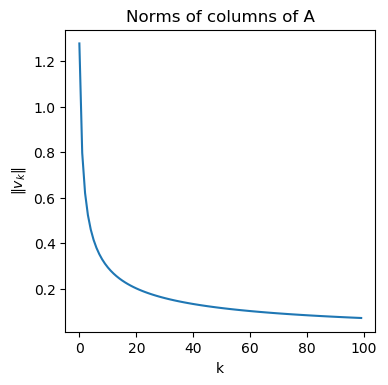

In [284]:
f, ax = plt.subplots(figsize=(4,4))
ax.plot(np.linalg.norm(A,ord=2,axis=0))
ax.set_xlabel("k")
ax.set_ylabel(r"$\Vert v_k \Vert$")
ax.set_title("Norms of columns of A")

We encounter the loss of significance when performing orthogonaliztion. The vector $u_1$ has the order of about $1$, then $u_2$ is also something similar. However, norms of vectors $u_2$ and further are of order at least $10^{-1}$. So the expression $(v_n,u_k)/(u_k,u_k)\cdot u_k$ is of order approximately $10^{O(n)}$. When performing large iterations there is a loss a significance: latter terms dominate the first ones.

From relative errors below we see that the solution is very inaccurate.

In [285]:
print("Rel. Error (A)",np.linalg.norm(A-Q_A.dot(R_A),2)/np.linalg.norm(A,2))
print("Rel. Error (B)",np.linalg.norm(B-Q_B.dot(R_B),2)/np.linalg.norm(B,2))

Rel. Error (A) 23392.9981145
Rel. Error (B) 0.963490713829


### 2. Householder QR (10 pts)

* Implement Householder QR decomposition as a function ```householder_qr(A)``` which outputs ```Q,R```. Apply it to the matrix $B$ created above. Print out the error.


* Apply it to the Hilbert matrix $A$ created in the first part of the problem and print out the error. Consider how stable is Householder compared to Gram-Schmidt. 

In [297]:
# INPUT : rectangular matrix A
# OUTPUT: matrices Q - orthogonal and R - upper triangular such that A=QR
def householder_qr(A): # 7 pts
    #n>m, A is n x m
    R  = np.copy(A)#just copy the shape
    #print("init",R)
    u=np.copy(R[:,0])
    u[0]=u[0]-np.linalg.norm(R[:,0],2)
    u=u * 1/ np.linalg.norm(u,2)
    #u=u* 1/np.linalg.norm(u,2)
 
    #print(u.reshape(u.shape[0],1).dot(u.reshape(1,u.shape[0])))
    
    Q1=np.eye(u.shape[0],dtype="float64")-2*np.outer(u,u)
    Q1=np.matrix(Q1)
    R=np.matrix(R)
    R[:,:]=Q1.dot(R[:,:])
    
    #print("R",R)
    Qs=Q1
    
    for i in np.arange(1,np.min(A.shape)-1):#
        #print("Q1",Q1)

        u=np.copy(R[i:,i])
        u[0]=u[0]-np.linalg.norm(R[i:,i],2)
        u=u * 1/ np.linalg.norm(u,2)
 
        Q1=np.eye(u.shape[0],dtype="float64")-2*np.outer(u,u)
        R[i:,i:]=Q1.dot(R[i:,i:])
        #print("R",R)
        #u=1/np.linalg.norm(u,2)*u
        Q1=np.block([[np.eye(i),np.zeros((i,np.min(A.shape)-i))],[np.zeros((np.min(A.shape)-i,i)),Q1]])
        Qs=Q1.dot(Qs)
        
    #R=Q1.dot(R)
    #print(R)
    
    return Qs.T, R





In [298]:
(Q_B,R_B)=householder_qr(B)#Random 100 x 100
(Q_A,R_A)=householder_qr(A)#Hilbert

print("Orthogonality measure(B)",np.linalg.norm(Q_B.T.dot(Q_B)-np.eye(100),2))
print("Orthogonality measure(A)",np.linalg.norm(Q_A.T.dot(Q_A)-np.eye(100),2))
print("Abs. Error (A)",np.linalg.norm(A-Q_A.dot(R_A),2))
print("Abs. Error (B)",np.linalg.norm(B-Q_B.dot(R_B),2))


Orthogonality measure(B) 8.60311012971e-15
Orthogonality measure(A) 6.82252192594e-15
Abs. Error (A) 1.87661672585e-15
Abs. Error (B) 3.35950189415e-13


We can see that the results are much better, even for Hilbert matrix.

In [299]:
print("Rel. Error (A)",np.linalg.norm(A-Q_A.dot(R_A),2)/np.linalg.norm(A,2))
print("Rel. Error (B)",np.linalg.norm(B-Q_B.dot(R_B),2)/np.linalg.norm(B,2))

Rel. Error (A) 8.59770046675e-16
Rel. Error (B) 6.65582318647e-16


Householder algorithm is much more stable than Gram-Schmidt's one since the relative errors are much smaller than in the first case(about 24000 and 0.96).

# Problem 3 (Low-rank decompositions)

## 45 pts

## 1. Theoretical tasks (15 pts)

* Prove that for any Hermitian matrix, singular values equal to absolute value of eigenvalues. Does this hold for a general matrix? Prove or provide a counterexample.


Let $A$ be a square Hermitian matrix, i.e. $A^*=A$. By the famous theorem from linear algebra, the eigenvalues are real, and, moreover, there is an orthogonal basis of eigenvectors, so we could decompose $A=T\Lambda T^{-1}$, where $T$ is a matrix of eigenvectors, $\Lambda = \text{diag}(\text{Spec}A)$. Since the eigenvalues are real, we could introduce a diagonal matrix of signs $\text{sgn}(\Lambda)$ and absolute values $\vert \Lambda \vert$. So $A=T \vert\Lambda\vert \text{sgn}(\Lambda) T^{-1}=T \vert\Lambda\vert \tilde{T}$. The basis is orthogonal, hence $T$ and $\tilde{T}$ are unitary matrices, $\vert\Lambda\vert$ is a non-negative diagonal matrix, so $T \vert\Lambda\vert \tilde{T}$ is, by definition, an SVD-decomposition of $A$. 

* Find analytically a skeleton decomposition of the matrix of size $n\times m$ with elements $a_{ij} = \sin i + \sin j$.

Firstly, compute the rank of such matrix. It turns out that after subtraction of the first row from all others we have elements $a'_{ij}=sin(i)-sin(1)$ for $i>1$. Since rank is preserved when performing column operations, subtract the first column from all others. This gives $a_{1j}=sin(j)-sin(1)$ for $j>1$,$a_{11}=2sin(1)$, $a_{i1}=sin(i)-sin(1)$ for $i>1$, and $a_{ij}=0$ for $i>1,j>1$. Thus $rank(A)=2$ and we need to decide on $2$ linearily independent rows and $2$ independent columns of $A$. Obviously we can take rows and columns $2,4$, the corresponding matrix 

$$\hat{A}= \begin{bmatrix}
                2sin2 & sin2+sin4\\
                sin4+sin2 & 2sin4
           \end{bmatrix}$$

is non-singular. The matrix $C$ is 2 columns of matrix $A$ corresponding to columns $2,4$, and matrix $R$ are rows $2,4$ of A. So we obtained a skeleton decomposition $A=C\hat{A}^{-1}R$. 



* Let $A\in\mathbb{C}^{n\times m}$ be of rank $r$ and let $A = U\Sigma V^*$ be its SVD. Prove that $\mathrm{im}(A^*) = \mathrm{span}\{v_1,\dots, v_r\}$, where $V = [v_1, \dots, v_n]$.

Let w.l.o.g. $m<n$ and $A=U\Sigma V^*$ be a singular value decomposition. The rank of $A$ is $r$ so we can drop the $n-r$ redundant rows and columns from matrices and obtain $A=U_r\Sigma_rV_r^*$ where $U_r$ is $n \times r$, $V_r^*$ is $r \times m$, and $\Sigma_r$ is $r \times r$. Since $\Sigma_r$ just multiplies columns when we multiply by it from the right, $\text{im}(A^*)=\text{im}(V_r \Sigma_r U_r^*)=\text{im}(V_r \Sigma_r U_r^*)$. By definition,

$$\text{im}(V_r)=\left\lbrace V_rx \quad \vert \quad x \in R^r  \right\rbrace, $$
$$\text{im}(V_rU_r)=\left\lbrace V_rU_r^*z \quad \vert \quad z \in R^n  \right\rbrace  .$$

Matrix $U_r^*$ maps $z$ to a $r$-dimensional space. Since $U_r^*$ is unitary, it is full rank, consider $U_r^*z=x$ and get the desired result.

## 2. Recommender system using SVD (30 pts)

In this task you are asked to build a simple movie recommender system based on *collaborative filtering* approach and SVD.
Collaborative filtering implies that you build recommendations based on the feedback of other users given in a matrix $\mathbf{M}$ of users vs. movies. 
If a user $i$ watched a movie $j$ and rated it, say, as $3$ out of $5$, then the value $3$ is the corresponding matrix entry, i.e. $\mathbf{M}_{i,j}=3$.
If a user did not watch a movie, then we put $0$ as a matrix element, i.e. $\mathbf{M}=0$. 
Hence, the matrix is sparse.

### Task 1. Building the core of recommender (15 pts)

Build representation of users and movies in the latent factors space with the help of SVD.

* We test the SVD model on a [Movielens 10M](https://grouplens.org/datasets/movielens/) dataset. Download the dataset using python functions provided in the following [Jupyter notebook](movielens10m.ipynb).


In [307]:




#import movielens10m #in order not to include the large code here,
                    #I just exported the notebook into python
    #IT DOES NOT WORK WITH TESTS
    
#M = get_movielens_data(local_file="./ml-10m.zip") 
#I downloaded it with this function and then set local_file not to download several times

Loading data into memory...
Done.


* Is it possible to use ```np.linalg.svd``` function to calculate SVD of the downloaded matrices on your laptop? Provide an estimate.


In [3]:
#(train_set,test_set) = movielens10m.split_data(M)
print(M.size)

10000054


The size of double precision representation is 64bit, or 8byte. So in the worst case (it is not, since the matrix is sparse) we need about $8 \cdot 10^{7}$ byte, which is approximately $80$Mbyte. We have such amount of memory. As to linalg.svd operations, if it needs mat-mat, then memory rise dramatically and it may not be placed in my RAM.


* Implement function `tr_svd` so that it computes truncated SVD using `scipy.linalg.svds`:
    * Be aware that `scipy` returns singular values in ascending order (see the [docs](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.linalg.svds.html)).
    * Sort all your svd data in descending (by singular values) order without breaking the result.
    

* Fix the rank of approximation and compute truncated SVD with `tr_svd` of the training set of the dataset. Plot the obtained singular values. Can you tell from the plot whether the data has a low-rank structure? Give your intuition, why it happens?


* Write the function `top_n` which takes user as a row of his/her ratings (including non-rated films, i.e. just a row from the train\test set), integer number $N$ and returns array of indices which correspond to $N$ highest ratings. Use function `np.argsort()`.


* Pick several users at random from the training set. Compare their top-10 films and top-10, suggested by your model ($A_k = U_k \Sigma_k V_k^T$). Comment on the result. **Note:** you can run all tests in this task with $k=25$.

In [49]:
import scipy as sp

# INPUT: A: scipy.sparse.csr_matrix (N_train x N_films), k - integer
# OUTPUT: U - np.array (N_train x k), S - np.array (k x k), Vh - np.array (k x N_films)
def tr_svd(A, k): # 5 pts
    # enter your code here
    (U,S,Vh) = sp.sparse.linalg.svds(A,k)
    permutationArray = np.arange(S.shape[0]-1,-1,-1)
    U=U[:,permutationArray]
    Vh=Vh[permutationArray,:]
    S=S[permutationArray]
    return U, S, Vh

# INPUT: user - np.array (N_films,), N - integer 
# OUTPUT: np.array (N,)
def top_n(user, N): # 2 pts
    # enter your code here
    return np.argsort(-user,axis=1)[:,:N]

print(train_set.shape)

(55903, 10677)


In [28]:
K=25 #approximation rank
(U,S,Vt)=tr_svd(train_set,K)

Text(0,0.5,'$\\sigma_k$')

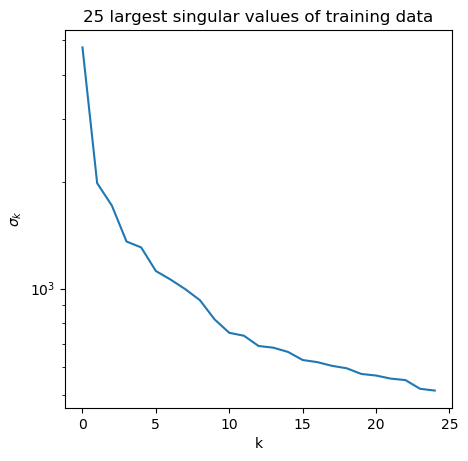

In [29]:
f, ax = plt.subplots(figsize=(5,5))

ax.plot(S)
ax.set_title(str(K)+" largest singular values of training data")
ax.set_xlabel("k")
ax.set_yscale("log")
ax.set_ylabel(r"$\sigma_k$")


Singluar values are decreased on approximately one order of magnitude. Intuitively we can claim that this is the evidence of data's low dimensionality. This may be due to existence of whole clusters of users, who prefer watching relatively same movies.

In [7]:
print(U.shape)
print(S.shape)
print(Vt.shape)
#U=sp.sparse.csr_matrix(U)
Vt=sp.sparse.csr_matrix(Vt)


index=np.random.randint(train_set.shape[0],size=(10,))
Ak = (U[index,:]*S).dot(Vt.toarray())
#print(index)
for i in np.arange(10): #for pretty printing
    print("User",i,top_n(Ak[i,:].reshape(1,Ak.shape[1]),10))
    print("User",i,"(approximated)",top_n(train_set[index[i],:].toarray(),10))
    print("Mutual films on top",set(top_n(Ak[i,:].reshape(1,Ak.shape[1]),10)).intersection(set(top_n(train_set[index[i],:].toarray(),10))))

(55903, 25)
(25,)
(25, 10677)
User 0 [ 176  403   34  165  107  605  162 1021 1312  166]
User 0 (approximated) [ 422 4590 2312 1830 2385 2503  466  253  784 3031]
Mutual films on top set()
User 1 [ 24 177  37 179  19 228  14 195 175 415]
User 1 (approximated) [ 29 139 195 244 401  24  22 610  37 382]
Mutual films on top {24, 195, 37}
User 2 [ 468  186  466 1041  451  447 1322  244  429   48]
User 2 (approximated) [ 447 1324 1473  451   50 1322 2032 1326  455  439]
Mutual films on top {1322, 451, 447}
User 3 [ 179  177  178  235 1008 1293  139   24 1328   37]
User 3 (approximated) [ 179 1468 1187 1500 1293 1903  139 2012 1192  498]
Mutual films on top {179, 139, 1293}
User 4 [ 188  461  466  704  277  997  156   56  190 1041]
User 4 (approximated) [2847   58  195 1815  425 2837  849 2969  367  190]
Mutual films on top {190}
User 5 [195  24  19 177 101 404 137 213 139  37]
User 5 (approximated) [2307   34 1293  798  137 1787   19  451  195   14]
Mutual films on top {19, 137, 195}
User 6 

Recommendations are not perfect, but sometimes the ratings are quite similar: there are always at least several films in predicted top-10 and real top-10.

### Task 2. Evaluating performance of the recommender (15 pts)

Suppose, we trained our model (obtain $U_k, \Sigma_k, V^T_k$ from $A_{train}$). Let's evaluate it! For this purpose we have $A_{test}$ (recall the function [```split_data```](movielens10m.ipynb)). And our goal is to obtain vectors of recommendation $r$ for each user (row) in the test set ($A_{test}$). But there is no need to recompute the whole SVD for each user. We have the tool, which is called _folding-in_ for recommender systems.

#### Folding-in technique                                                             

<img src="decomp.png" width='450'>


A new user can be considered as an update to the original matrix (appending new row). Appending a row in the original matrix corresponds to appending a row into the users latent factors matrix $U_k$ in the SVD decomposition. 
Since we do not want to recompute the SVD, we project the new user on the space of found latent factors $V_k$, which spans the row space of matrix $A_k = U_k \Sigma_k V^T_k$ (recall the problem from the theoretical tasks).
The orthoprojection on this space is $P = V_kV_k^T$ (check that it satisfies definition of orthoprojection, i.e. $P^2=P$, $P^T = P$).

Thus, the recommendation vector $r$ for a new user $x$ (considered as a column vector) can be written as

$$
r = V_kV_k^T x.
$$


#### Computing the total score
You have to iterate over all users in the test set and make the following steps:
* obtain vector $x$, which is the same as user row, but the last $N = 3$ rated films should be filled with zeroes. Example:

$$
user = (0, 0, 1, 3, 5, 2, 0, 2, 2, 1, 0, 5) \;\; \to \;\;  x = (0, 0, 1, 3, 5, 2, 0, 2, 2, 0, 0, 0).
$$

* compute the folding-in prediction $r$:

$$
r = V_k V_k^T x.
$$

* Obtain top-3 from $user$ (truth) and top-3 from $r$ (prediction). The number of films appearing _simultaneously_ in both top-3's  should be added to the `total_score`. Write the corresponding function `total_score_folding`, which takes the sparse test matrix $A_{test}$,  $V_k$ from truncated SVD of $A_{train}$ and compute the total score. 

**Example: **

|    $user$    |     $recommendation$    |
|:------------:|:----------:|
|    (**1**,**2**,3)   |  (10,**2**,**1**)  |
| (34, 27, **69**) | (**69**, 5, 9) |
|    (7,6,4)   |   (8,9,2)  |

```total_score``` = 2 + 1 + 0 = 3.

In [53]:
# INPUT: V - np.array(N_films, k), test_data - scipy.sparse.csr_matrix (N_test x N_films)
# OTPUT: total_score - integer
def calc_intersection(arr): #function to feed it to apply_along_axis
    return np.intersect1d(arr[:3],arr[3:]).shape[0]

def total_score_folding(V, test_data): # 8 pts
    test_data[:,-3:]=0
    #print(test_data)
    r = test_data.dot(V.T.dot(V))
    #print(r)
    r = top_n(r[:,:],3)
    #print(r)
    #print(top_n(test_data.toarray(),3))
    total_score=0
    total_score=np.apply_along_axis(calc_intersection,1,np.block([r,top_n(test_data.toarray(),3)])).sum()
    #for k in np.arange(r.shape[0]):#calculating the rating
    #    total_score = total_score+np.intersect1d(top_n(r[k,:].toarray().reshape(1,r.shape[1]),3),top_n(test_data[k,:].toarray().reshape(1,test_data.shape[1]),3)).shape[0]
    # enter you code here
    return total_score

In [57]:
score=total_score_folding(Vt,test_set[:,:])
print("Relative score:", score/(3*test_set.shape[0]))
print("Absolute score:",score)


D:\Programs\Anaconda\lib\site-packages\scipy\sparse\compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


Relative score: 0.108598688134
Absolute score: 4553


So we see that our recommender system is not so perfect, however the quality could be increased if we take larger $k$ -- rank of approximation.

### Task 3 (bonus) Fine-tuning your model

* Try to find the rank that produces the best evaluation score.
    * Plot the dependency of evaluation score on the rank of SVD for all your trials in one graph.
* Report the best result and the corresponding SVD rank.
* Compare your model with the non-personalized recommender which simply recommends top-3 movies with highest average ratings. 

**Note**, that you don't have to recompute SVD to evaluate your model. You might compute once relatively large ($k =500$) truncated SVD and then just use submatrices of it.

**Optionally:**
You may want to test your parameters with different data splittings in order to minimize the risk of local effects.
You're also free to add modifications to your code for producing better results. Report what modificatons you've done and what effect it had if any.

# Problem 4 (eigenvalues)

## 55 pts

### 1. Theoretical tasks (10 pts)

* Prove that normal matrix is Hermitian iff its eigenvalues are real. Prove that normal matrix is unitary iff its eigenvalues satisfy $|\lambda| = 1$. 

#### 1

First let us prove that if $\lambda \in \text{Spec}(A)$, then $(A^*x,x)=\overline{\lambda}(x,x)$. The first condition implies $(Ax,x)=(\lambda x, x)$. Note that $(Ax,x)=(x,A^*x)$, so $\overline{(A^*x,x)}=\lambda (x,x)$, therefore, $(A^*x,x)=\overline{\lambda}(x,x)$.   

Let $A$ be a hermitian matrix (so $A^*=A$), $x$ be its eigenvector with eigenvalue $\lambda$. Consider the hermitian product $(Ax,x)=\lambda(x,x)$. However $(Ax,x)=(x,A^*x)=\overline{\lambda}(x,x)$. We got $\lambda=\overline{\lambda}$ so it is real.

Conversely, let all eigenvalues of normal matrix $A$ are real. It means that for all eigenvectors $x$ with eigenvalue $\lambda$ holds $(Ax,x)=\lambda(x,x)$. It turns out that $(Ax,x)=\overline{(x,Ax)}=\overline{\lambda}(x,x)=\lambda(x,x)=(x,Ax)$. So $(Ax,x)=(x,Ax)$ implies $A=A^*$ by definition of conjugate operator.

#### 2

Now prove that $A$ is unitary iff $\vert \lambda \vert =1 \quad \forall \lambda \in \text{Spec}(A)$.

Let $A$ is unitary, then $AA^*=A^*A=I$, thus there is no $\lambda=0 \notin \text{Spec}(A)$. Let $\lambda \in \text{Spec}(A)$, so there exists $x$ such that $Ax=\lambda x$. Multiply (with a native hermite product) both parts by $Ax$, it gives

$$
\begin{split}
(Ax,Ax)=\lambda (x,Ax),\\
\lambda^2 = \frac{(x,x)}{(x,x)},\\
\lambda^2 = 1,\\
\end{split}
$$
hence, $\vert\lambda\vert=1$.

Conversely, let all $\lambda \in \text{Spec}(A)$ have unit absolute value. Since $A$ is normal, it is diagonalizable, so there exists a basis of eigenvectors and any vector of our space can be represented as a sum of eigenvectors. It is sufficient to prove unitary property for one arbitrary eigenvector $x$. Consider $(Ax,Ax)=\lambda^2 (x,x)=(A^*Ax,x)=(AA^*x,x)=\overline{\lambda}^2(x,x)$, the last follows from the lemma from the first subproblem (see above). So $\lambda^2 (x,x)= \overline{\lambda}^2(x,x)$ implies $\lambda^2=1$, therefore $(A^*Ax,x)=(x,x)$, $(AA^*x,x)=(x,x)$, for arbitrary $x$, so $AA^*=I$ which means that $A$ is unitary.

* The following problem illustrates instability of the Jordan form. Find theoretically the eigenvalues of the perturbed Jordan block:

$$
    J(\varepsilon) = 
    \begin{bmatrix} 
     \lambda & 1 & & & 0 \\ 
     & \lambda & 1 & & \\ 
     &  & \ddots & \ddots & \\ 
     & & & \lambda & 1 \\ 
     \varepsilon & & & & \lambda  \\ 
    \end{bmatrix}_{n\times n}
$$

Comment how eigenvalues of $J(0)$ are perturbed for large $n$.



Let $\xi$ denotes new eigenvalues (the variable for characteristic polynomial). We need to compute determinant (use column decomposition on the first column)

$$
f(\xi)=\text{det}(J(\epsilon)-\xi I)= \epsilon (-1)^{n+1}+(\lambda-\xi)(\lambda-\xi)^{n-1}.
$$
Eigenvalues are the roots of polynomial $f(\xi)$:

$$
(\lambda-\xi)^{n}=\epsilon (-1)^{n}.
$$

Since we need to take root of $(-1)$ we need to do it carefully, let $z=\lambda-\xi=\vert z \vert e^{i\phi}$ for some $\vert z \vert$ and $\phi$ to be defined.

$$
\vert z \vert^n = \epsilon, \quad i\phi n = i\pi n + 2i\pi k, k \in Z
$$
so
$$\lambda-\xi=\sqrt[\leftroot{1}\uproot{1}n]{\epsilon}\exp{\frac{\pi n + 2\pi k}{n}i}$$
and
$$\xi=\lambda-\sqrt[\leftroot{1}\uproot{1}n]{\epsilon}\exp{\frac{\pi n + 2\pi k}{n}i}$$
are the new eigenvalues. Suppose $\epsilon \sim 10^{-p}$ and $n\rightarrow \infty$. Then $\xi=\lambda-10^{-p/n}\exp{\frac{\pi n + 2\pi k}{n}i} \rightarrow \lambda-\exp{i\pi}= \lambda + 1$.

It might seem not so significant, but important thing is that with relatively small perturbations Jordan block disappears and there is a diagonalizable matrix since there are $n$ complex roots of multiplicity $1$.

### 2. PageRank (30 pts)


#### Damping factor importance

* Write the function ```pagerank_matrix(G)``` that takes an adjacency matrix $G$ as an input and outputs the corresponding PageRank matrix $A$.

* Find PageRank matrix $A$ that corresponds to the following graph: <img src="graph.png" width='250'>
What is its largest eigenvalue? What multiplicity does it have?


* Implement the power method for a given matrix $A$, an initial guess $x_0$ and a number of iterations ```num_iter```. It should be organized as a function ```power_method(A, x0, num_iter)``` that outputs approximation to eigenvector $x$, eigenvalue $\lambda$ and history of residuals $\{\|Ax_k - \lambda_k x_k\|_2\}$. Make sure that the method conveges to the correct solution on a matrix $\begin{bmatrix} 2 & -1 \\ -1 & 2 \end{bmatrix}$ which is known to have the largest eigenvalue equal to $3$.


* Run the power method for the graph presented above and plot residuals $\|Ax_k - \lambda_k x_k\|_2$ as a function of $k$ for ```num_iter=100``` and random initial guess ```x0```.  Explain the absence of convergence. 


* Consider the same graph, but with the directed edge that goes from the node 3 to the node 4 being removed. Plot residuals as in the previous task and discuss the convergence. Now, run the power method with ```num_iter=100``` for 10 different initial guesses and print/plot the resulting approximated eigenvectors. Why do they depend on the initial guess?


In order to avoid this problem Larry Page and Sergey Brin [proposed](http://ilpubs.stanford.edu:8090/422/1/1999-66.pdf) to use the following regularization technique:

$$
A_d = dA + \frac{1-d}{N} \begin{pmatrix} 1 & \dots & 1 \\ \vdots & & \vdots \\ 1 & \dots & 1 \end{pmatrix},
$$

where $d$ is a small parameter in $[0,1]$ (typically $d=0.85$), which is called **damping factor**, $A$ is of size $N\times N$. Now $A_d$ is the matrix with multiplicity of the largest eigenvalue equal to 1. 
Recall that computing the eigenvector of the PageRank matrix, which corresponds to the largest eigenvalue, has the following interpretation. Consider a person who stays in a random node of a graph (i.e. opens a random web page); at each step s/he follows one of the outcoming edges uniformly at random (i.e. opens one of the links). So the person randomly walks through the graph and the eigenvector we are looking for is exactly his/her stationary distribution — for each node it tells you the probability of visiting this particular node. Therefore, if the person has started from a part of the graph which is not connected with the other part, he will never get there.  In the regularized model, the person at each step follows one of the outcoming links with probability $d$ OR visits a random node from the whole graph with probability $(1-d)$.

* Now, run the power method with $A_d$ and plot residuals $\|A_d x_k - \lambda_k x_k\|_2$ as a function of $k$ for $d=0.99$, ```num_iter=100``` and a random initial guess ```x0```.


Usually, graphs that arise in various areas are sparse (social, web, road networks, etc.) and, thus, computation of a matrix-vector product for corresponding PageRank matrix $A$ is much cheaper than $\mathcal{O}(N^2)$. However, if $A_d$ is calculated directly, it becomes dense and, therefore, $\mathcal{O}(N^2)$ cost grows prohibitively large for  big $N$.


* Implement fast matrix-vector product for $A_d$ as a function ```pagerank_matvec(A, d, x)```, which takes a PageRank matrix $A$ (in sparse format, e.g., ```csr_matrix```), damping factor $d$ and a vector $x$ as an input and returns $A_dx$ as an output. Generate a random adjacency matrix of size $10000 \times 10000$ with only 100 non-zero elements and compare ```pagerank_matvec``` performance with direct evaluation of $A_dx$.

In [308]:
import scipy.sparse as sp
# INPUT:  G - np.ndarray
# OUTPUT: A - np.ndarray (of size G.shape)
def pagerank_matrix(G): # 5 pts
    rowsums=G.sum(axis=1)
    rowsums[rowsums==0]=1 # to avoid division by zero, it does not affect the result
    if(sp.issparse(G)):
        print(rowsums.shape)
        diag_mat=sp.lil_matrix((rowsums.shape[0],rowsums.shape[0]))
        diag_mat.setdiag(1/rowsums) #more efficient for soarse representations
        return G.T*diag_mat
    else:
        return G.T*1/rowsums
    # enter your code here
    

In [309]:
#Let us compute the example graph
G=np.array([[0,1,0,0,0],
                                [0,0,1,0,0],
                                [1,1,0,0,0],
                                [0,0,0,0,1],
                                [0,0,0,1,0]
                               ])
G_pr=pagerank_matrix(G)
print(G_pr)

(G_eigv,_)=np.linalg.eig(G_pr)
print(G_eigv)

[[ 0.   0.   0.5  0.   0. ]
 [ 1.   0.   0.5  0.   0. ]
 [ 0.   1.   0.   0.   0. ]
 [ 0.   0.   0.   0.   1. ]
 [ 0.   0.   0.   1.   0. ]]
[-0.5+0.5j -0.5-0.5j  1.0+0.j   1.0+0.j  -1.0+0.j ]


As we can see with our pagerank_matrix function and the standard eig from numpy, the PR matrix of $G$ has 2 largest eigenvalues: $1$ and $-1$, and $1$ has multiplicity $2$. 

In [310]:
# INPUT:  A - np.ndarray (2D), x0 - np.ndarray (1D), num_iter - integer (positive) 
# OUTPUT: x - np.ndarray (of size x0), l - float, res - np.ndarray (of size num_iter + 1 [include initial guess])

def power_method(A, x0, num_iter): # 5 pts
    res= np.zeros(num_iter,dtype="float64") #+1 to add x0
    x0=x0/np.linalg.norm(x0,2)
    x1=x0
    for k in np.arange(num_iter):
        x1=A.dot(x0)
        l=np.dot(x0,x1)
        res[k]=np.linalg.norm(x1-l*x0,2)
        x0=x1/np.linalg.norm(x1,2)
        
    # enter your code here
    return x0, l, res

#print(power_method(np.array([2,-1,-1,2]).reshape(2,2),np.random.uniform(0,5,size=(2,)),50))
#test print to ensure it is working

Now let us test power_method on pagerank matrix from the example.

In [311]:
(G_pr_eigv_pow,G_pr_lam_pow,G_pr_res_pow)=power_method(G_pr,np.random.uniform(0,5,size=(G_pr.shape[0],)),100)

Power Method Lambda: 0.995876123666


Text(0.5,1,'Residuals,Example Matrix')

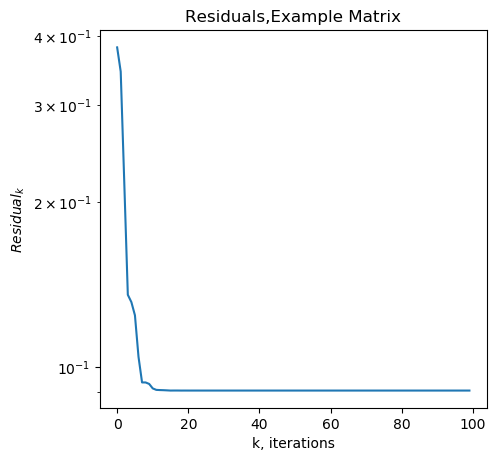

In [312]:
f, ax = plt.subplots(figsize=(5,5))

print("Power Method Lambda:",G_pr_lam_pow)
ax.plot(G_pr_res_pow[:])
ax.set_xlabel("k, iterations")
ax.set_ylabel(r"$Residual_k$")
ax.set_yscale("log")
ax.set_title("Residuals,Example Matrix")

The residual is relatively high. After several attempts to compute eigenvalues we get considerably different results.

In [313]:
lam_pow=np.zeros(500)
for kk in np.arange(500):
    (_,lam_pow[kk],_)=(G_pr_eigv_pow,G_pr_lam_pow,G_pr_res_pow)=power_method(G_pr,np.random.uniform(0,5,size=(G_pr.shape[0],)),100)

Text(0.5,1,'Histogram of $x_{100}$ (power method)')

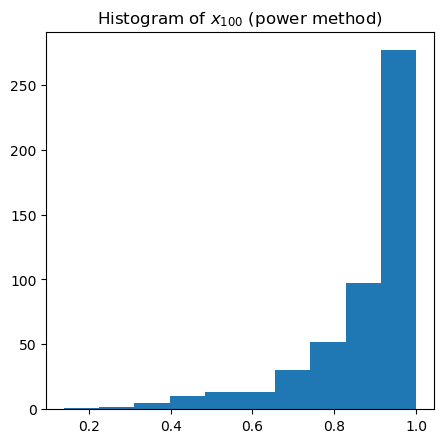

In [314]:
f, ax = plt.subplots(figsize=(5,5))

ax.hist(lam_pow)
ax.set_title(r"Histogram of $x_{100}$ (power method)")


So, we can see that approximately half of the time the method converges to $1$, however in other cases it ends up far away from $1$. The convergence speed of power method depends on the ratio $\vert \lambda_1 \vert /\vert\lambda_2 \vert$ of two largest eigenvalues, which equals one in our case. Therefore, we are lucky if sometimes we get the right answer.

Now let us remove link $3 \rightarrow 4$ from the graph.

In [315]:
G=np.array([[0,1,0,0,0],
            [0,0,1,0,0],
            [1,1,0,0,0],
            [0,0,0,0,0],
            [0,0,0,1,0]
                        ])
G_pr=pagerank_matrix(G)
print(G_pr)

(G_eigv,_)=np.linalg.eig(G_pr)
print(G_eigv)

[[ 0.   0.   0.5  0.   0. ]
 [ 1.   0.   0.5  0.   0. ]
 [ 0.   1.   0.   0.   0. ]
 [ 0.   0.   0.   0.   1. ]
 [ 0.   0.   0.   0.   0. ]]
[-0.5+0.5j -0.5-0.5j  1.0+0.j   0.0+0.j   0.0+0.j ]


Now we have one largest eigenvalue equals $1$.

In [316]:
#testing
(G_pr_eigv_pow,G_pr_lam_pow,G_pr_res_pow)=power_method(G_pr,np.random.uniform(0,5,size=(G_pr.shape[0],)),100)

Power Method Lambda: 1.0


Text(0.5,1,'Residuals,Example2 Matrix')

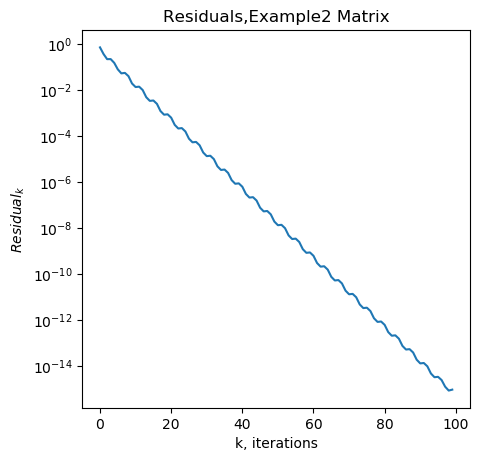

In [317]:
f, ax = plt.subplots(figsize=(5,5))

print("Power Method Lambda:",G_pr_lam_pow)
ax.plot(G_pr_res_pow[:])
ax.set_xlabel("k, iterations")
ax.set_ylabel(r"$Residual_k$")
ax.set_yscale("log")
ax.set_title("Residuals,Example2 Matrix")

Now we have geometric convergence. Let us estimate the eigenvectors. Since the output vector has unit norm, we can plot them on the chart and compare.

In [318]:
vec_pow=np.zeros((G_pr.shape[1],1))
#f, ax = plt.subplots(figsize=(5,5))
for kk in np.arange(10):
    (vec_pow[:,0],_,_)=(G_pr_eigv_pow,G_pr_lam_pow,G_pr_res_pow)=power_method(G_pr,np.random.uniform(0,5,size=(G_pr.shape[0],)),100)
    print(vec_pow[:,0])
    #ax.plot(vec_pow[:,0])

#ax.set_title("Eigvecs, power method")
#ax.set_xlabel("k, coordinate")
#ax.set_ylabel("Value of k")

[ 0.33333333  0.66666667  0.66666667  0.          0.        ]
[ 0.33333333  0.66666667  0.66666667  0.          0.        ]
[ 0.33333333  0.66666667  0.66666667  0.          0.        ]
[ 0.33333333  0.66666667  0.66666667  0.          0.        ]
[ 0.33333333  0.66666667  0.66666667  0.          0.        ]
[ 0.33333333  0.66666667  0.66666667  0.          0.        ]
[ 0.33333333  0.66666667  0.66666667  0.          0.        ]
[ 0.33333333  0.66666667  0.66666667  0.          0.        ]
[ 0.33333333  0.66666667  0.66666667  0.          0.        ]
[ 0.33333333  0.66666667  0.66666667  0.          0.        ]


Seems like the eigenvectors are the same, so they do not depend on initial guess. It is normal case since the matrix has 1-dimensional subspace corresponding to largest eigenvalue. However, it is not the case for the original graph (See below, the vectors are completely different). It is due to formal absence of convergence.

In [319]:
#Let us compute the example graph
G=np.array([[0,1,0,0,0],
                                [0,0,1,0,0],
                                [1,1,0,0,0],
                                [0,0,0,0,1],
                                [0,0,0,1,0]
                               ])
G_pr=pagerank_matrix(G)
print(G_pr)

(G_eigv,_)=np.linalg.eig(G_pr)
print(G_eigv)

[[ 0.   0.   0.5  0.   0. ]
 [ 1.   0.   0.5  0.   0. ]
 [ 0.   1.   0.   0.   0. ]
 [ 0.   0.   0.   0.   1. ]
 [ 0.   0.   0.   1.   0. ]]
[-0.5+0.5j -0.5-0.5j  1.0+0.j   1.0+0.j  -1.0+0.j ]


Text(0,0.5,'Value of k')

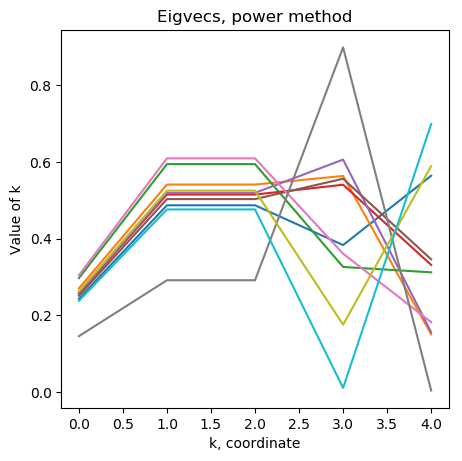

In [320]:
vec_pow=np.zeros((G_pr.shape[1],1))
f, ax = plt.subplots(figsize=(5,5))
for kk in np.arange(10):
    (vec_pow[:,0],_,_)=(G_pr_eigv_pow,G_pr_lam_pow,G_pr_res_pow)=power_method(G_pr,np.random.uniform(0,5,size=(G_pr.shape[0],)),100)
    #print(vec_pow[:,0])
    ax.plot(vec_pow[:,0])
    
ax.set_title("Eigvecs, power method")
ax.set_xlabel("k, coordinate")
ax.set_ylabel("Value of k")

### Introducing damping factor

Now let us test the model with damping $d=0.99$ and the original graph.

$$
A_d = dA + \frac{1-d}{N} \begin{pmatrix} 1 & \dots & 1 \\ \vdots & & \vdots \\ 1 & \dots & 1 \end{pmatrix},
$$

In [321]:
d=0.99#damping factor

G_pr=pagerank_matrix(G)
G_pr=d*G_pr+(1-d)/G_pr.shape[0]*np.ones(G_pr.shape)
#print(G_pr)

(G_eigv,_)=np.linalg.eig(G_pr)
print(G_eigv)

#testing
#num_iter changed to 300 for better picture
(G_pr_eigv_pow,G_pr_lam_pow,G_pr_res_pow)=power_method(G_pr,np.random.uniform(0,5,size=(G_pr.shape[0],)),300)

[-0.495+0.495j -0.495-0.495j  1.000+0.j     0.990+0.j    -0.990+0.j   ]


Power Method Lambda: 0.999659806638
Final Residual 0.0259877199019


Text(0.5,1,'Residuals, with damping')

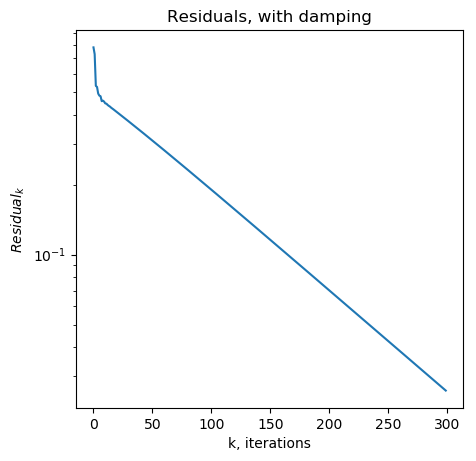

In [322]:
f, ax = plt.subplots(figsize=(5,5))

print("Power Method Lambda:",G_pr_lam_pow)
print("Final Residual",G_pr_res_pow[-1])
ax.plot(G_pr_res_pow[:])
ax.set_xlabel("k, iterations")
ax.set_ylabel(r"$Residual_k$")
ax.set_yscale("log")
ax.set_title("Residuals, with damping")

Now there is only one largest eigenvalue $1$, others are different, but still very similar to the original ones. The convergence is better, however the ratio is still very poor.

Now we want to implement the method for sparse CSR-matrix.

In [33]:
import scipy.sparse as sp
import numpy as np

d=0.99
inds=np.random.randint(0,9999,size=(100,2))
A=sp.csr_matrix((np.ones(100),(inds[:,0],inds[:,1])),shape=(10000,10000),dtype="float64")

In [6]:
# INPUT:  A - np.ndarray (2D), d - float (from 0.0 to 1.0), x - np.ndarray (1D, size of A.shape[0/1])
# OUTPUT: y - np.ndarray (1D, size of x)
def pagerank_matvec(A, d, x): # 2 pts
    # enter your code here
    y=(d*A+(1-d)/A.shape[0]*np.ones(A.shape)).dot(x)
    return y

In [35]:
x=np.random.uniform(0,1,size=(10000,1))
%timeit pagerank_matvec(A,0.99,x)
A1=np.zeros((10000,10000))
A1[inds[:,0],inds[:,1]]=1
%timeit (d*A1+(1-d)/A1.shape[0]*np.ones(A1.shape)).dot(x)
A1=0# to kill the matrix, garbage collector will hadle it

982 ms ± 16.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.54 s ± 81 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


This presents the fact that matvec in its sparse version is approximately $1.5$ times more efficient than in dense one.

#### DBLP: computer science bibliography

Download the dataset from [here](https://goo.gl/oZVxEa), unzip it and put `dblp_authors.npz`  and `dblp_graph.npz` in the same folder with this notebook. Each value (author name) from `dblp_authors.npz` corresponds to the row/column of the matrix from `dblp_graph.npz`. Value at row `i` and column `j` of the matrix from `dblp_graph.npz` corresponds to the number of times author `i` cited papers of the author `j`. Let us now find the most significant scientists according to PageRank model over DBLP data.

* Load the weighted adjacency matrix and the authors list into Python using ```load_dblp(...)``` function. Print its density (fraction of nonzero elements). Find top-10 most cited authors from the weighted adjacency matrix. Now, make all the weights of the adjacency matrix equal to 1 for simplicity (consider only existence of connection between authors, not its weight). Obtain the PageRank matrix $A$ from the adjacency matrix and verify that it is stochastic.
 
 
* In order to provide ```pagerank_matvec``` to your ```power_method``` (without rewriting it) for fast calculation of $A_dx$, you can create a ```LinearOperator```: 
```python
L = scipy.sparse.linalg.LinearOperator(A.shape, matvec=lambda x, A=A, d=d: pagerank_matvec(A, d, x))
```
Calling ```L@x``` or ```L.dot(x)``` will result in calculation of ```pagerank_matvec(A, d, x)``` and, thus, you can plug $L$ instead of the matrix $A$ in the ```power_method``` directly. **Note:** though in the previous subtask graph was very small (so you could disparage fast matvec implementation), here it is very large (but sparse), so that direct evaluation of $A_dx$ will require $\sim 10^{12}$ matrix elements to store - good luck with that (^_<)≡☆


* Run the power method starting from the vector of all ones and plot residuals $\|A_dx_k - \lambda_k x_k\|_2$  as a function of $k$ for $d=0.85$.


* Print names of the top-10 authors according to PageRank over DBLP when $d=0.85$.


* (Bonus) Does it look suspicious? Why? Discuss what could cause such results.

In [7]:

from scipy.sparse import load_npz
import numpy as np
def load_dblp(path_auth, path_graph):
    G = load_npz(path_graph).astype(float)
    with np.load(path_auth) as data: authors = data['authors']
    return G, authors
G, authors = load_dblp('dblp_authors.npz', 'dblp_graph.npz')


In [8]:
#Get density
print("Density of G",G.getnnz()/(G.shape[0]*G.shape[1]))

Density of G 4.4986518152305776e-05


To calculate top cited authors, we need to sum $G$ by columns to count input links.

In [9]:
inWeights =G.sum(axis=0)

topAuthor_ids = np.argsort(inWeights[0,:])[0,-10:][0,np.arange(9,-1,-1)]


In [10]:

print("TOP-10 cited authors")
print("Author","Rating")
print(np.block([authors[topAuthor_ids].reshape(10,1),inWeights[0,topAuthor_ids].reshape(10,1)]))

TOP-10 cited authors
Author Rating
[['Scott Shenker' '119853.0']
 ['Andrew Zisserman' '118558.0']
 ['Hari Balakrishnan' '117253.0']
 ['Jiawei Han' '116708.0']
 ['Anil K. Jain' '113874.0']
 ['Cordelia Schmid' '102996.0']
 ['Jitendra Malik' '101657.0']
 ['Ion Stoica' '98017.0']
 ['David E. Culler' '95762.0']
 ['David G. Lowe' '93678.0']]


In [11]:
(row_ids,col_ids)=G.nonzero()

In [12]:
G[row_ids,col_ids]=1#Assigning weights to 1
row_ids=None #for garbage
col_ids=None #for garbage

In [ ]:
G_pr=pagerank_matrix(G)
print(G_pr)
#arr = np.array([[1,0,0,0,0,1,0,0,2,3],[1,2,0,0,5,0,7,0,9,0]]).reshape(2,10)
#print(arr.nonzero())

(1766547, 1)


### 3. QR algorithm (10 pts)

* Implement QR-algorithm without shifting. Prototype of the function is given below

In [300]:
# INPUT: 
# A_init - square matrix, 
# num_iter - number of iterations for QR algorithm
# OUTPUT: 
# Ak - transformed matrix A_init given by QR algorithm, 
# convergence - numpy array of shape (num_iter, ), 
# where we store the maximal number from the Chebyshev norm 
# of triangular part of the Ak for every iteration
def qr_algorithm(A_init, num_iter): # 3 pts
    # enter your code here
    (Qk,Rk)=householder_qr(A_init)#np.linalg.qr(A_init) because it does not work for householder
    print(np.linalg.norm(Qk.dot(Rk),2))
    convergence=np.zeros(num_iter)
    Ak=Qk.T.dot(A_init.dot(Qk))#for init purposes
    convergence[0]=np.sum(np.tril(Ak))-np.sum(np.diag(Ak))
    (Qk,Rk)=householder_qr(Ak)
    for k in np.arange(1,num_iter):
        Ak=Qk.T.dot(Ak.dot(Qk))
        convergence[k]=np.abs(np.sum(np.tril(Ak))-np.sum(np.diag(Ak)))
        (Qk,Rk)=householder_qr(Ak)
    Ak=Qk.T.dot(Ak.dot(Qk))
    return Ak, convergence

#### Symmetric case

- Create **symmetric** tridiagonal $11 \times 11$ matrix with elements $-1, 2, -1$ on sub-, main- and upper diagonal respectively without using loops. 
- Run $300$ iterations of the QR algorithm for this matrix. 
- Plot the output matrix with function ```plt.spy(Ak, precision=1e-7)```.
- Plot convergence of QR-algorithm.

<img src=https://pbs.twimg.com/media/Bq6t17OIMAALkiA.jpg width=30%/>
*Photo comment*: professor Gilbert Strang (MIT) "These are 121 cupcakes with my favorite -1, 2, -1 matrix. It was the day before Thanksgiving and two days before my birthday. A happy surprise." 

In [301]:
A=np.zeros((11,11))

rows,cols=np.indices(A.shape)
A[rows==cols]=2
A[np.abs(cols-rows)==1]=-1
print(A)

[[ 2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  2.]]


In [302]:
(Ak,conv)=qr_algorithm(A,num_iter=300)

3.93185165258


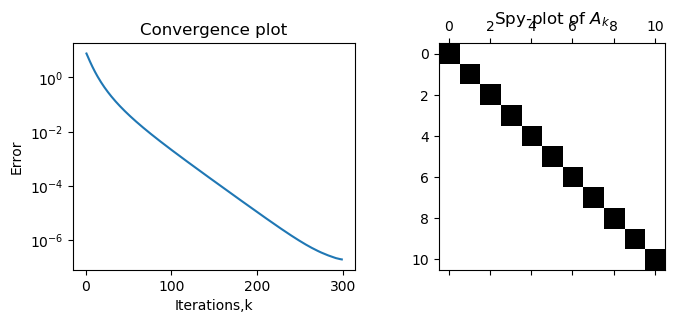

In [303]:
f, (ax1,ax2) = plt.subplots(1,2,figsize=(8,3))

ax1.set_title("Convergence plot")
ax1.set_xlabel("Iterations,k")
ax1.set_ylabel("Error")
ax1.plot(conv)
ax1.set_yscale("log")

ax2.set_title(r"Spy-plot of $A_k$")
ax2.spy(Ak, precision=1e-7)


#### Nonsymmetric case

- Create **nonsymmetric** tridiagonal $11 \times 11$ matrix with elements $5, 3, -2$ on sub-, main- and upper diagonal respectively without using loops. 
- Run $200$ iterations of the QR algorithm for this matrix. 
- Plot the result matrix with function ```plt.spy(Ak, precision=1e-7)```. Is this matrix lower triangular? How does this correspond to the claim about convergence of the QR algorithm?

In [304]:
A=np.zeros((11,11))

rows,cols=np.indices(A.shape)
A[rows==cols]=3
A[cols-rows==-1]=5
A[cols-rows==1]=-2

print(A)

[[ 3. -2.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 5.  3. -2.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  5.  3. -2.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  5.  3. -2.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  5.  3. -2.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  5.  3. -2.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  5.  3. -2.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  5.  3. -2.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  5.  3. -2.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  5.  3. -2.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  5.  3.]]


In [305]:
(Ak,conv)=qr_algorithm(A,num_iter=300)

7.58648649238


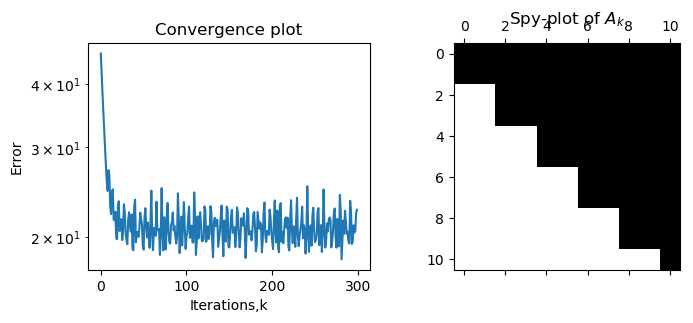

In [306]:
f, (ax1,ax2) = plt.subplots(1,2,figsize=(8,3))

ax1.set_title("Convergence plot")
ax1.set_xlabel("Iterations,k")
ax1.set_ylabel("Error")
ax1.plot(conv)
ax1.set_yscale("log")

ax2.set_title(r"Spy-plot of $A_k$")
ax2.spy(Ak, precision=1e-7)
